# Analyzing Life Expectation and GDP

I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

Research Questions:
<br>
How has life expectancy changed over the years in the countries?
<br>
How has the GDP changed over the years in the respective countries?
<br>
Is there a correlation between GDP and life expectancy?
<br>
What is the average life expectancy in the countries?
<br>
What is the average GDP in the countries?

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
# read data
df = pd.read_csv('all_data.csv')

In [5]:
# inspect data
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
# rename live expectancy column so it is easier to work with
df = df.rename(columns={'Life expectancy at birth (years)': 'Expectancy'})

In [5]:
df.describe()

,Year,Expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


Through the describe()-method we can see that the period of data collected is between 2000 and 2015. The lowest life expectancy is 44.3 years and the highest is 81 years. While the lowest GDP is 4.415703e+09 and the highest is 1.810000e+13.

What countries are represented in the data?

In [6]:
# examine data
# what countries are there?
print(f"Unique countries: {df['Country'].unique()}")

Unique countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [29]:
print(f"Unique countries: {df['Country'].nunique()}")

Unique countries: 6


## Explore data

### Focus on Life Expectancy

#### Average Life Expectancy in the countries

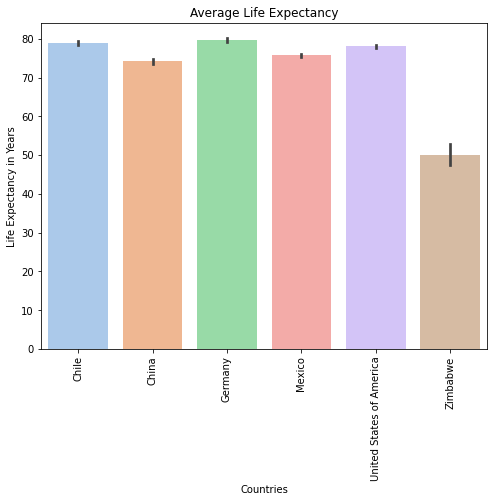

In [83]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x='Country', y='Expectancy', palette='pastel')
ax.set(xlabel='Countries', ylabel='Life Expectancy in Years')
plt.title('Average Life Expectancy')
plt.xticks(rotation=90)
plt.show()

It becomes clear, that the Life Expectancy in Zimbabe is lower on average, while the rest of the countries seems pretty similar.

#### Development of the Life Expectancy

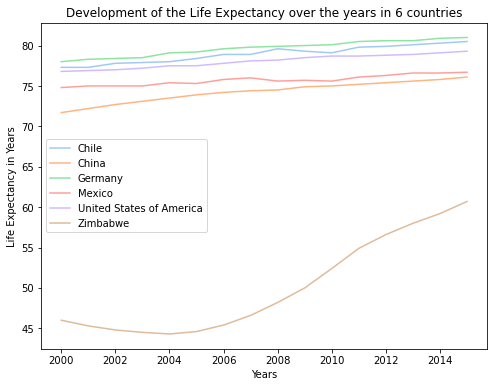

In [64]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=df, x='Year', y='Expectancy', hue='Country', palette='pastel')
ax.set(xlabel='Years', ylabel='Life Expectancy in Years')
plt.legend(loc=6)
plt.title('Development of the Life Expectancy over the years in 6 countries')
plt.show()

Life expectancy has increased in all countries. While Chile, Germany, China, Mexico and the United States were already at a comparatively high level, life expectancy in Zimbabwe was very low in the early 2000s. A look at Zimbabwe alone shows the country's development in more detail:

In [45]:
zimbabwe = df[df.Country == 'Zimbabwe']
zimbabwe.describe()

,Year,Expectancy,GDP
count,16.000000,16.000000,1.600000e+01
mean,2007.500000,50.093750,9.062580e+09
std,4.760952,5.940311,4.298310e+09
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,45.175000,5.748309e+09
50%,2007.500000,47.400000,6.733671e+09
75%,2011.250000,55.325000,1.263446e+10
max,2015.000000,60.700000,1.630467e+10


We can now read out that the lowest life expectancy in Zimbabwe from 2000 to 2015 was 44.3 years, the highest was 66.7.

<Figure size 432x288 with 0 Axes>

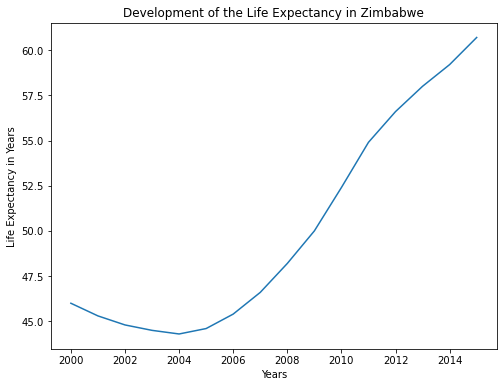

In [63]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=zimbabwe, x='Year', y='Expectancy')
ax.set(xlabel='Years', ylabel='Life Expectancy in Years')
plt.title('Development of the Life Expectancy in Zimbabwe')
plt.show()

We now examine the remaining countries in more detail:

In [49]:
five_countries = df[df.Country != 'Zimbabwe']
five_countries.describe()

,Year,Expectancy,GDP
count,80.000000,80.000000,8.000000e+01
mean,2007.500000,77.328750,4.654786e+12
std,4.638856,2.256478,5.370596e+12
min,2000.000000,71.700000,6.973681e+10
25%,2003.750000,75.600000,7.630910e+11
50%,2007.500000,77.650000,2.182555e+12
75%,2011.250000,79.100000,7.819550e+12
max,2015.000000,81.000000,1.810000e+13


We can already observe a clear upward shift in values here.

<Figure size 432x288 with 0 Axes>

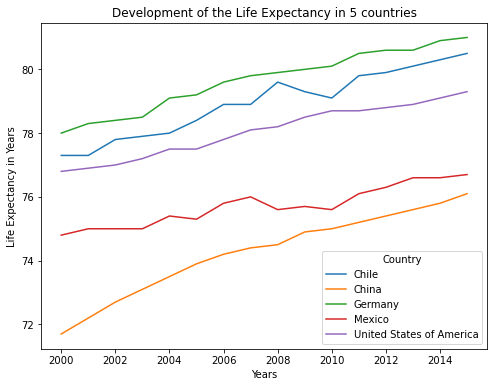

In [62]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=five_countries, x='Year', y='Expectancy', hue='Country')
ax.set(xlabel='Years', ylabel='Life Expectancy in Years')
plt.title('Development of the Life Expectancy in 5 countries')
plt.show()

Now it also becomes clear that the values are not as close to each other as they appear in the first line diagram.

### Focus on the GDP

#### Average GDP in the countries

<Figure size 432x288 with 0 Axes>

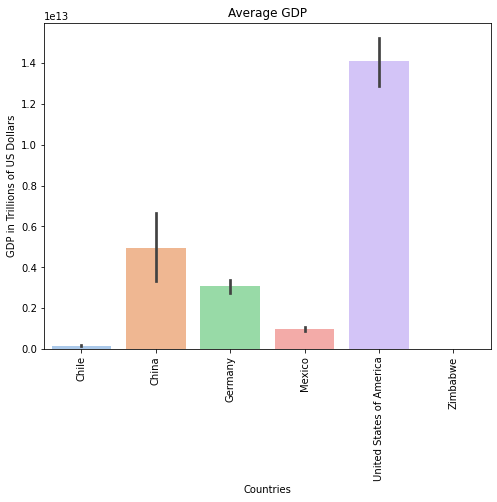

In [85]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df, x='Country', y='GDP', palette='pastel')
ax.set(xlabel='Countries', ylabel='GDP in Trillions of US Dollars')
plt.title('Average GDP')
plt.xticks(rotation=90)
plt.show()

It seems that the US has a much higher GDP. Zimbabwe is not visible at all, Chile is almost not seen. 

#### Development of the GDP

<Figure size 432x288 with 0 Axes>

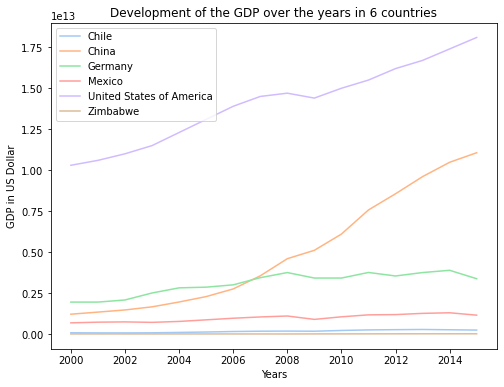

In [67]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.lineplot(data=df, x='Year', y='GDP', hue='Country', palette='pastel')
ax.set(xlabel='Years', ylabel='GDP in US Dollar')
plt.legend(loc=2)
plt.title('Development of the GDP over the years in 6 countries')
plt.show()

China has experienced enormous growth: GDP has increased more than ninefold. 

## Correlation between GDP and Life Expectancy

<Figure size 432x288 with 0 Axes>

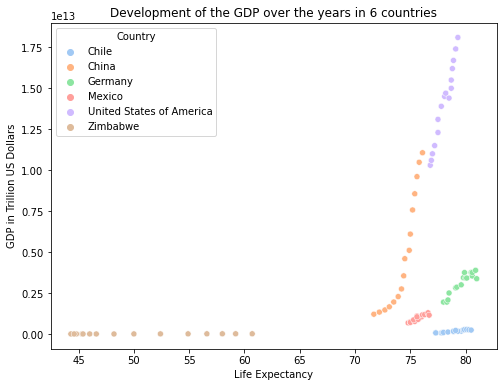

In [88]:
plt.clf()
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df, x='Expectancy', y='GDP', hue='Country', palette='pastel')
ax.set(xlabel='Life Expectancy', ylabel='GDP in Trillion US Dollars')
plt.title('Development of the GDP over the years in 6 countries')
plt.show()

Because the countries are so different, the graph is confusing. We look at the countries separately:

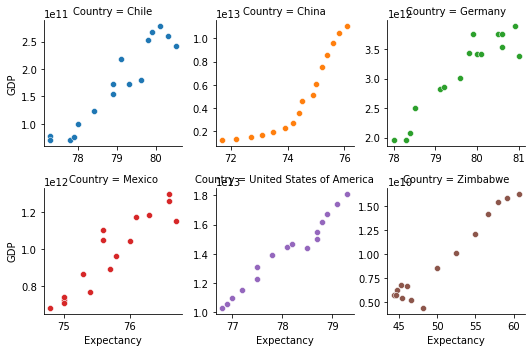

In [91]:
g = sns.FacetGrid(df, col="Country",  hue='Country', height=2.5, col_wrap=3, sharey = False, sharex = False)
g.map(sns.scatterplot, "Expectancy", "GDP")

Correlations seems obvious in all countries. Let's confirm it with Pearson's R:

In [109]:
r, p = pearsonr(df.Expectancy[df.Country == 'Chile'], df.GDP[df.Country == 'Chile'])
print('Pearsons r for Chile is:', r)

Pearsons r for Chile is: 0.9498766659254416


In [110]:
r, p = pearsonr(df.Expectancy[df.Country == 'Zimbabwe'], df.GDP[df.Country == 'Zimbabwe'])
print('Pearsons r for Zimbabwe is:', r)

Pearsons r for Zimbabwe is: 0.9661998955858777


In [112]:
r, p = pearsonr(df.Expectancy[df.Country == 'China'], df.GDP[df.Country == 'China'])
print('Pearsons r for China is:', r)

Pearsons r for China is: 0.9085255408648358


In [113]:
r, p = pearsonr(df.Expectancy[df.Country == 'Mexico'], df.GDP[df.Country == 'Mexico'])
print('Pearsons r for Mexico is:', r)

Pearsons r for Mexico is: 0.9322377167847082


In [114]:
r, p = pearsonr(df.Expectancy[df.Country == 'United States of America'], df.GDP[df.Country == 'United States of America'])
print('Pearsons r for the US is:', r)

Pearsons r for the US is: 0.9817092382430257


In [115]:
r, p = pearsonr(df.Expectancy[df.Country == 'Germany'], df.GDP[df.Country == 'Germany'])
print('Pearsons r for Germany is:', r)

Pearsons r for Germany is: 0.932698898256127


As expected, all have a positive correlation close to 1.

## Conclusions

-  How has life expectancy changed over the years in the countries?
    -  Life expectancy has increased in all countries.
-  How has the GDP changed over the years in the respective countries?
    -  GDP has risen sharply, especially in China and the United States. There was little development in the other countries.
-  Is there a correlation between GDP and life expectancy?
    -  In all countries we can observe that this is the case.
-  What is the average life expectancy in the countries?
    -  In all countries, life expectancy is similar, in the range of 75 years (+/-). Only in Zimbabwe is it significantly lower.
-  What is the average GDP in the countries?
    -  In China, Mexico and Germany, GDPs are relatively similar. While that of the USA is significantly higher and Mexico and Zimbabwe are hardly relevant.